In [50]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vehicles.csv",usecols=["km_driven", "selling_price"],header=0)
df

selling_price  km_driven
0              17899    63500.0
1                  0       10.0
2              46463     7554.0
3                  0       10.0
4              49999    70150.0
...              ...        ...
19996          49999    43406.0
19997          12127    32867.0
19998              0    17514.0
19999          14661    30486.0
20000          35999    22078.0

[20001 rows x 2 columns]

PREPROCESSING DATA

In [3]:
df.isnull().sum()

selling_price       0
km_driven        2389
dtype: int64

In [4]:
new_df = df
new_df.dropna(inplace=True)
new_df = new_df.reset_index(drop=True)

In [5]:
new_df.isnull().sum()
new_df

selling_price  km_driven
0              17899    63500.0
1                  0       10.0
2              46463     7554.0
3                  0       10.0
4              49999    70150.0
...              ...        ...
17607          49999    43406.0
17608          12127    32867.0
17609              0    17514.0
17610          14661    30486.0
17611          35999    22078.0

[17612 rows x 2 columns]

In [29]:
column = ["selling_price","km_driven"]
for i in column:
    mscore = float(new_df[i].mean())
    new_df[i] = new_df[i].replace(0,mscore)
new_df2 = new_df.reset_index(drop=True)

OVERLAY DATA CLEANSING

In [30]:
# column = ["km_driven","selling_price"]
# for i in column:
#     if i == "km_driven":
#         overvalue = 100000
#     elif i == "selling_price":
#         overvalue = 500000
#     # overvalue = new_df[i].max()
#     index_name = new_df[new_df[i] >= overvalue].index
#     new_df.drop(index_name,inplace= True)
# new_df = new_df.reset_index(drop=True)
index_name = new_df[new_df["selling_price"] >= 12345678].index
new_df.drop(index_name,inplace= True)
new_df = new_df.reset_index(drop=True)


Normalisasi km_driven

In [31]:
maksimum2 = new_df["km_driven"].max()
minimum2 = new_df["km_driven"].min()
jarak2 = maksimum2-minimum2
maksimum1 = new_df["selling_price"].max()
minimum1 = new_df["selling_price"].min()
jarak1 = maksimum1-minimum1
arr_norm=[]

row = len(new_df) - 1
for i in range(row):
    arr_norm.append([(new_df.iloc[i,0] - minimum1)/jarak1 , (new_df.iloc[i,1] - minimum2)/jarak2])

new_df2 = pd.DataFrame(arr_norm,columns = ["selling_price_norm","km_driven_norm"])
arr_norm[0]

[0.049855292076022496, 0.025399559360705024]

In [19]:
new_df2.isnull().sum()

selling_price_norm    0
km_driven_norm        0
dtype: int64

In [34]:
backup = new_df2
new_df2 = backup

In [35]:
column = ["selling_price_norm","km_driven_norm"]
for i in column:
    index_name = new_df2[new_df2[i] == 0].index
    new_df2.drop(index_name,inplace= True)
new_df2 = new_df2.reset_index(drop=True)

In [21]:
def euclideanDistance(data, centroids, ax=1):
    return np.linalg.norm(data - centroids, axis=ax)
#memakai linalg karena sama degan algoritma euclide euclide 

In [36]:
arr = new_df2.to_numpy()
arr.max()

1.0

In [98]:
epsilon = list(range(4)) 

for k in range(1,10):
    
    cluster = pd.read_csv('vehicles.csv') # Read data file into 'cluster'
    
    rows = cluster.shape[0] 
    cols = cluster.shape[1] 
  
    centroids = cluster.loc[np.random.randint(1,rows+1,k)] 
    centroids['new'] = list(range(1,k+1)) 
    centroids.set_index('new',inplace = True) 
    d = np.random.rand(rows) 

    number_of_iterations = 15
    temp_epsilon = list(range(number_of_iterations)) 

    for i in range(0,number_of_iterations): 

        for j in range(0,rows): 
            d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
        cluster['centroid number'] = d

        mean_x = list(range(k)) 
        mean_y = list(range(k)) 
        for m in range(0,k): 
            mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['x'].mean()
            mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['y'].mean()
        centroids.replace(list(centroids['x']),mean_x,inplace = True) 
        centroids.replace(list(centroids['y']),mean_y,inplace = True)
    
        z = list(range(k)) 
        for p in range(0,k): 
            z[p] = ((cluster[cluster['centroid number'] == p+1][['x','y']] - centroids.iloc[p])**2).values.sum()
        temp_epsilon[i] = sum(z) 
        
        epsilon[k-2] = temp_epsilon[i] 
    
    %reset_selective -f centroids 

Text(0, 0.5, 'Inertia')

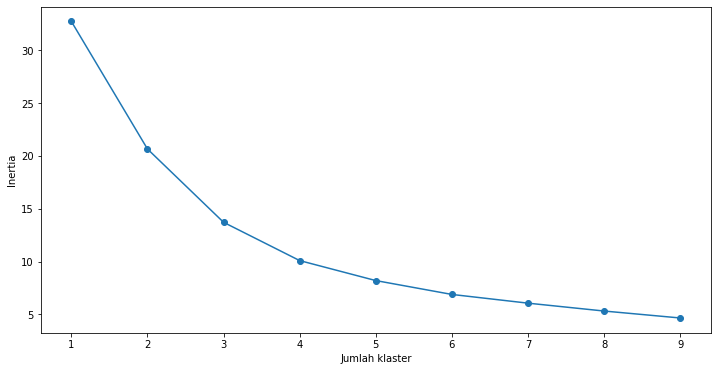

In [37]:
#Versi 1
k = list(range(1,10)) 
plt.figure(figsize=(12,6)) 
plt.plot(k,epsilon,'go--', linewidth=1.5, markersize=4) 
plt.xlabel('Jumlah Klaster') 
plt.ylabel('Inertia') 


#Versi2
# from sklearn.cluster import KMeans

# SSE = []
# for cluster in range(1,10):
#     kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
#     kmeans.fit(new_df2)
#     SSE.append(kmeans.inertia_)

# frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Jumlah klaster')
# plt.ylabel('Inertia')

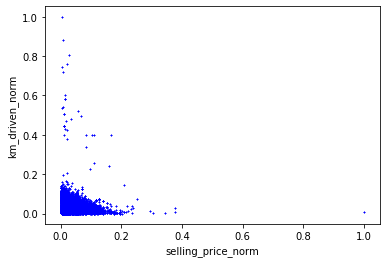

In [38]:
"""--- Memvisualkan persebaran data ---"""

new_df2.plot.scatter(
    x = "selling_price_norm",
    y = "km_driven_norm",
    c='blue',
    marker='x',
    s=1
)

In [41]:
#Print Centroid
k = 3
# x coordinates of random centroid
C_x = np.random.randint(0, 1, size=k)
# y coordinates of random centroid
C_y = np.random.randint(0, 1, size=k)
centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [42]:
centroid

array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [43]:
euclideanDistance(arr[0], centroid)

array([0.05595255, 0.05595255, 0.05595255])

In [44]:
"""--- Menentukan dan mengkonfigurasi fungsi kmeans ---"""


class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(
                    featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid) /
                                 original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid])
                     for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [45]:
colmap = {0: 'green', 1: 'purple', 2: 'blue'}

In [46]:
centroid

array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [47]:
X = new_df2.to_numpy()
model = K_Means()
model.fit(X)

48.290335676695406
218353.25996368914
481.6884577523366
108.38178141464184
9.188399953008187
22.97346715420474
7.014154773990701
2.4984950856423676
0.43762430893217674
0.07341249776073178


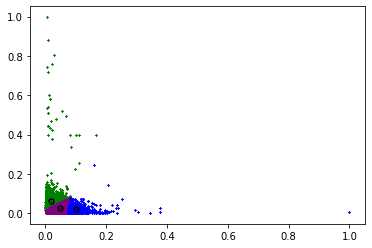

In [48]:
for classification in model.classifications:
    color = colmap[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1],
                    marker="x", color=color, s=2, linewidths=5)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=2, linewidths=5)


In [37]:
plt.show()

In [94]:
from sklearn.cluster import KMeans